In [17]:
import numpy as np
import os
import torch
import matplotlib.pyplot as plt
from tree_learn.util import (get_eval_res_components, get_segmentation_metrics, plot_instance_evaluation_segments,
                            load_results, get_qualitative_assessment, get_semantic_assessment, get_instance_assessment,
                            load_data)

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
benchmark_forest_path = '../../data/benchmark/L1W_voxelized01.laz' # path to benchmark forest
instance_evaluation_path = '../../data/pipeline/L1W/results/full_forest/instance_evaluation.pt' # path to instance evaluation object

NON_TREE_CLASS_IN_INSTANCE_PREDS = 0
NON_TREES_CLASS_IN_INSTANCE_LABELS = 0
UNLABELED_CLASS_IN_INSTANCE_LABELS = -1

# loading data

In [24]:
instance_evaluation, instance_labels, instance_preds = load_results(instance_evaluation_path, benchmark_forest_path, UNLABELED_CLASS_IN_INSTANCE_LABELS)

# qualitative assessment of detections

In [ ]:
n_fp, n_fn = get_qualitative_assessment(instance_evaluation)

# semantic segmentation

In [ ]:
get_semantic_assessment(instance_labels, instance_preds, non_tree_class_in_instance_preds=NON_TREE_CLASS_IN_INSTANCE_PREDS, non_tree_class_in_instance_labels=NON_TREES_CLASS_IN_INSTANCE_LABELS)

# instance segmentation

In [ ]:
get_instance_assessment(instance_evaluation)

In [ ]:
get_instance_assessment(instance_evaluation)

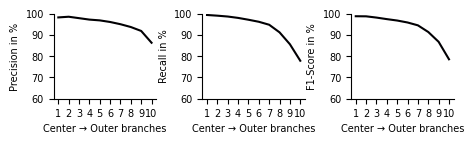

In [25]:
color = '#010003'
fontsize=7
fig_size=(4,1)
y_range=[60, 100]
x_label = "Center \u2192 Outer branches"
fig, axs = plt.subplots(1, 3, figsize=fig_size)
plt.tight_layout()


# precision
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 2:12].mean(0).to_numpy() * 100
axs[0] = plot_instance_evaluation_segments(axs[0], values, fontsize=fontsize, measure="Precision in %", y_range=y_range, color=color, x_label=x_label)

# recall
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 12:22].mean(0).to_numpy() * 100
axs[1] = plot_instance_evaluation_segments(axs[1], values, fontsize=fontsize, measure="Recall in %", y_range=y_range, color=color, x_label=x_label)


# f1-score
values = instance_evaluation['segmentation_results']['xy_partition_relative'].iloc[:, 22:32].mean(0).to_numpy() * 100
axs[2] = plot_instance_evaluation_segments(axs[2], values, fontsize=fontsize, measure="F1-Score in %", y_range=y_range, color=color, x_label=x_label)

fig.subplots_adjust(wspace=0.45, left=0, right=1, bottom=0.15, top=1)
plt.show()

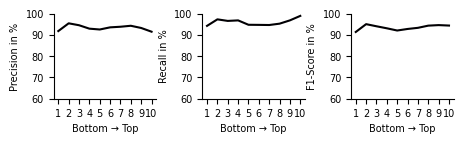

In [ ]:
color = '#010003'
fontsize=7
fig_size=(4,1)
y_range=[60, 100]
x_label = "Bottom \u2192 Top"
fig, axs = plt.subplots(1, 3, figsize=fig_size)
plt.tight_layout()


# precision
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 2:12].mean(0).to_numpy() * 100
axs[0] = plot_instance_evaluation_segments(axs[0], values, fontsize=fontsize, measure="Precision in %", y_range=y_range, color=color, x_label=x_label)

# recall
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 12:22].mean(0).to_numpy() * 100
axs[1] = plot_instance_evaluation_segments(axs[1], values, fontsize=fontsize, measure="Recall in %", y_range=y_range, color=color, x_label=x_label)


# f1-score
values = instance_evaluation['segmentation_results']['z_partition_relative'].iloc[:, 22:32].mean(0).to_numpy() * 100
axs[2] = plot_instance_evaluation_segments(axs[2], values, fontsize=fontsize, measure="F1-Score in %", y_range=y_range, color=color, x_label=x_label)

fig.subplots_adjust(wspace=0.45, left=0, right=1, bottom=0.15, top=1)
plt.show()